# Introduction
This tutorial will introduce how to use NLTK package to analyze grammatical features of text data, including __POS tagging__ and __Parsing__. 

__POS tagging__ is marking the __part-of-speech__ of words in the text. A part-of-speech is a category of words that play similar roles in the grammatical structure of a sentence. In English, the basic parts of speech include _noun_, _adjective_, _adverb_, _verb_, _preposition_, etc. In NLTK, POS tagging has several tag sets so that it can give us more grammatical information about words. This tutorial will not just stop at POS tagging, but will introduce some fun tasks based on that, along with which some frequently-used NLTK resources and functions will also be introduced.

__Parsing__ is the syntax analysis of a sentence. Basically, it breaks down the sentence and marks each component its grammatical role. Different from POS tagging, parsing can show the grammar role of several words as a phrase and also their relationship to each other. In this way, parsing can show the grammatical hierarchy structure of a sentence, which is a tree. Based on parsing, like POS tagging, we can also do a lot of tasks.

The theory of POS tagging and parsing used in NLTK is beyond this tutorial. You just need to know that they are not based on solid theories but just probability analysis on large corpus, so sometimes they may make mistakes.

In [1]:
import nltk
from nltk import word_tokenize
from nltk import pos_tag

When using NLTK package, it is common to meet LookupError that shows some resources are not found. As NLTK contains a lot of resources, it doesn't download everything in installation, so sometimes you need to download them manually. To do that, open a terminal and open a python shell:

    $ python3

In the python shell, import nltk and download the specific resource you need by its name:

    >>> import nltk
    >>> nltk.download("resource_name")

We will cover following contents in this tutorial.
- [1 POS tagging](#1-POS-tagging)
    - [1.1 Introduction](#1.1-Introduction)
    - [1.2 Application: Topic Analysis by Extracting Nouns](#1.2-Application:-Topic-Analysis-by-Extracting-Nouns)
- [2 Parsing](#2-Parsing)
    - [2.1 Introduction](#2.1-Introduction)
    - [2.2 Stanford Parser](#2.2-Stanford-Parser)
    - [2.3 Application: Question Generation](#2.3-Application:-Question-Generation)
- [Reference](#Reference)

## 1 POS tagging
### 1.1 Introduction
First, let's see a basic example of POS tagging in NLTK. We need to use nltk.__word_tokenize()__ to split text into tokens first, and then use nltk.__pos_tag()__.

In [2]:
test_text = "Practical Data Science is awesome!"
tokens = word_tokenize(test_text)
tags = pos_tag(tokens)
print(tags)

[('Practical', 'NNP'), ('Data', 'NNP'), ('Science', 'NNP'), ('is', 'VBZ'), ('awesome', 'JJ'), ('!', '.')]


From the result above you can see that nltk.pos_tag() receives tokens as argument and returns list of tuples including each word's POS tag. The default tag set of NLTK is __Penn Treebank Tag Set__, which is widely used in NLP community.

Part of POS tags in Penn Treebank Tag Set is listed below.

| Tag | Description            | Tag  | Description                    |
| :-- | :--------------------- | :--- | :----------------------------- |
| VB  | verb, base form        | VBD  | verb, past sense               |
| VBG | verb, present particle | VBZ  | verb, 3rd person sing. present |
| NN  | noun, singular         | NNS  | noun, plural                   |
| NNP | proper noun, singular  | NNPS | proper noun, plural            |
| JJ  | adjective              | PRP  | personal pronoun               |
| RB  | adverb                 | DT   | determiner                     |

With POS tagging, we can do some tasks based on that. 

### 1.2 Application: Topic Analysis by Extracting Nouns
We can extract all the nouns from the text, which is useful because nouns usually show the topic. We can see that tags of nouns, i.e. _NN_, _NNS_, _NNP_, _NNPS_, all start with "NN", and that is designed deliberately for us to use. The example text below is from https://en.wikipedia.org/wiki/Data_science

In [3]:
text = '''Data science, also known as data-driven science, is an interdisciplinary field of scientific methods, 
          processes, algorithms and systems to extract knowledge or insights from data in various forms, 
          either structured or unstructured, similar to data mining. Data science is a "concept to unify 
          statistics, data analysis, machine learning and their related methods" in order to "understand and 
          analyze actual phenomena" with data. It employs techniques and theories drawn from many fields 
          within the broad areas of mathematics, statistics, information science, and computer science, 
          in particular from the subdomains of machine learning, classification, cluster analysis, 
          uncertainty quantification, computational science, data mining, databases, and visualization.'''
tokens = word_tokenize(text)
tags = pos_tag(tokens)
nouns = [tag for tag in tags if tag[1].startswith("NN")]
print(nouns)

[('Data', 'NNP'), ('science', 'NN'), ('science', 'NN'), ('field', 'NN'), ('methods', 'NNS'), ('processes', 'NNS'), ('algorithms', 'NN'), ('systems', 'NNS'), ('knowledge', 'NN'), ('insights', 'NNS'), ('data', 'NNS'), ('forms', 'NNS'), ('mining', 'NN'), ('Data', 'NNP'), ('science', 'NN'), ('concept', 'NN'), ('statistics', 'NNS'), ('data', 'NNS'), ('analysis', 'NN'), ('machine', 'NN'), ('learning', 'NN'), ('methods', 'NNS'), ('order', 'NN'), ('phenomena', 'NNS'), ('data', 'NNS'), ('techniques', 'NNS'), ('theories', 'NNS'), ('fields', 'NNS'), ('areas', 'NNS'), ('mathematics', 'NNS'), ('statistics', 'NNS'), ('information', 'NN'), ('science', 'NN'), ('computer', 'NN'), ('science', 'NN'), ('subdomains', 'NNS'), ('machine', 'NN'), ('learning', 'NN'), ('classification', 'NN'), ('cluster', 'NN'), ('analysis', 'NN'), ('uncertainty', 'NN'), ('quantification', 'NN'), ('science', 'NN'), ('data', 'NN'), ('mining', 'NN'), ('databases', 'NNS'), ('visualization', 'NN')]


We can also use other tag sets, just declare it in the pos_tag(). For example, if we use __"universal"__ tagset, in which all nouns are just tagged with 'NOUN', we can extract all nouns more easily.

In [4]:
tags_universal = pos_tag(tokens, tagset='universal')
nouns_universal = [tag for tag in tags_universal if tag[1]=="NOUN"]
print(nouns_universal)

[('Data', 'NOUN'), ('science', 'NOUN'), ('science', 'NOUN'), ('field', 'NOUN'), ('methods', 'NOUN'), ('processes', 'NOUN'), ('algorithms', 'NOUN'), ('systems', 'NOUN'), ('knowledge', 'NOUN'), ('insights', 'NOUN'), ('data', 'NOUN'), ('forms', 'NOUN'), ('mining', 'NOUN'), ('Data', 'NOUN'), ('science', 'NOUN'), ('concept', 'NOUN'), ('statistics', 'NOUN'), ('data', 'NOUN'), ('analysis', 'NOUN'), ('machine', 'NOUN'), ('learning', 'NOUN'), ('methods', 'NOUN'), ('order', 'NOUN'), ('phenomena', 'NOUN'), ('data', 'NOUN'), ('techniques', 'NOUN'), ('theories', 'NOUN'), ('fields', 'NOUN'), ('areas', 'NOUN'), ('mathematics', 'NOUN'), ('statistics', 'NOUN'), ('information', 'NOUN'), ('science', 'NOUN'), ('computer', 'NOUN'), ('science', 'NOUN'), ('subdomains', 'NOUN'), ('machine', 'NOUN'), ('learning', 'NOUN'), ('classification', 'NOUN'), ('cluster', 'NOUN'), ('analysis', 'NOUN'), ('uncertainty', 'NOUN'), ('quantification', 'NOUN'), ('science', 'NOUN'), ('data', 'NOUN'), ('mining', 'NOUN'), ('databa

Just list all the tags tuple may not be that useful. We can analyze its frequency using nltk.__FreqDist()__. It will return a FreqDist object and using its __most_common(N)__ method will return frequencies of the most frequent _N_ (tag, token) tuples.

In [5]:
nouns_fd = nltk.FreqDist(nouns)
print(nouns_fd)
nouns_freq = [noun for noun in nouns_fd.most_common(5)]
freq_nouns = [noun[0] for (noun, _) in nouns_fd.most_common(5)]
print(nouns_freq)
print(freq_nouns)

<FreqDist with 34 samples and 48 outcomes>
[(('science', 'NN'), 6), (('data', 'NNS'), 3), (('learning', 'NN'), 2), (('machine', 'NN'), 2), (('mining', 'NN'), 2)]
['science', 'data', 'learning', 'machine', 'mining']


'science', 'data', 'mining', 'analysis', 'Data' are quite good words for describing the topic of our example text. 

## 2 Parsing
### 2.1 Introduction
Parsing is more complicated than POS tagging. To begin with, we start with a simple example to get some intuition. First, we need to define a set of context-free grammars (CFG) as our rules for parsing.

In [6]:
from nltk import CFG
sentence = "CMU has a good reputation"
grammar = CFG.fromstring('''
    S -> NP VP
    NP -> N
    NP -> Det JJ N
    VP -> V NP
    Det -> "a"
    JJ -> "good"
    N -> "CMU" | "reputation"
    V -> "has"
    ''')
print(type(grammar))
print(grammar)

<class 'nltk.grammar.CFG'>
Grammar with 9 productions (start state = S)
    S -> NP VP
    NP -> N
    NP -> Det JJ N
    VP -> V NP
    Det -> 'a'
    JJ -> 'good'
    N -> 'CMU'
    N -> 'reputation'
    V -> 'has'


Here "NP" refers to Noun Phrase, "VP" refers to Verb Phrase. A lot of sentences are in the structure of NP VP, including our example sentence. 

As you can see, defining grammar by ourselves requires a lot of work if you want your parser to be general, but it is still useful for some professionals. We can build a parser based on our grammars. A basic kind of parser is __Recursive Descent Parser__, which builds our parsing tree from top to down.

In [7]:
from nltk import RecursiveDescentParser
parser = RecursiveDescentParser(grammar)
print(type(parser))
tokens = word_tokenize(sentence)
parse_trees = parser.parse(tokens)
print(type(parse_trees))

<class 'nltk.parse.recursivedescent.RecursiveDescentParser'>
<class 'generator'>


We can see that the parsing result is a generator. We need a for loop to get the actual parsing tree. IPython can visualize the parsing tree quite clear as an image, and the print function can show a string version of the tree.

<class 'nltk.tree.Tree'>


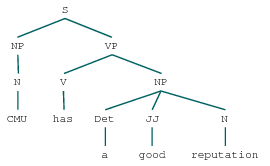

(S (NP (N CMU)) (VP (V has) (NP (Det a) (JJ good) (N reputation))))


In [8]:
import IPython
for tree in parse_trees:
    print(type(tree))
    IPython.core.display.display(tree)
    print(tree)

### 2.2 Stanford Parser
To save effort, we can use some predefined parser model developed by NLP community. One common choice is __Stanford Parser__. 

NLTK has an interface for Stanford Parser but it doesn't contain the actual model. We need to download the model from https://nlp.stanford.edu/software/lex-parser.shtml (the latest version right now is 3.9.1 released at 2018-02-07) and extract it. Use the following code to install Stanford Parser (englishPCFG) to NLTK.

<class 'nltk.parse.stanford.StanfordParser'>
<class 'nltk.tree.Tree'>


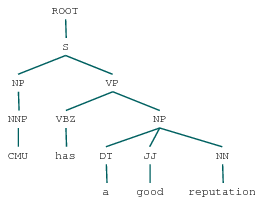

(ROOT
  (S
    (NP (NNP CMU))
    (VP (VBZ has) (NP (DT a) (JJ good) (NN reputation)))))


In [9]:
import os
from nltk.parse import stanford
os.environ["CLASSPATH"] = "stanford-parser-full-2018-02-27/" # path to the extracted folder
parser = stanford.StanfordParser(model_path="edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz")
print(type(parser))
parse_trees = parser.parse(tokens)
for tree in parse_trees:
    print(type(tree))
    IPython.core.display.display(tree)
    print(tree)

### 2.3 Application: Question Generation
With a general parser, we can do much more things based on it, for example, a simple question generation system!

The text is from https://simple.wikipedia.org/wiki/Google. First, we need to split the long text into sentences, NLTK has a nltk.tokenize.__sent_tokenize()__ function to do that.

In [10]:
from nltk.tokenize import sent_tokenize
text = ("""Google's search engine can find pictures, videos, news, Usenet newsgroups, and things to buy online. """ 
        """By June 2004, Google had 4.28 billion web pages on its database, 880 million pictures""" 
        """and 845 million Usenet messages — six billion things. Google's American website """
        """has an Alexa rank of 1, meaning it is the most widely visited website in the world. It is so widely""" 
        """known that people are using the word "google" as a verb that means "to search for something on Google"; """ 
        """but because more than half of people on the web use it, "google" has been used to mean "to search the web". """
        """Parent company of google is ALPHABET.""")
sentences = sent_tokenize(text)
for i,sent in enumerate(sentences):
    print(str(i)+" "+sent)

0 Google's search engine can find pictures, videos, news, Usenet newsgroups, and things to buy online.
1 By June 2004, Google had 4.28 billion web pages on its database, 880 million picturesand 845 million Usenet messages — six billion things.
2 Google's American website has an Alexa rank of 1, meaning it is the most widely visited website in the world.
3 It is so widelyknown that people are using the word "google" as a verb that means "to search for something on Google"; but because more than half of people on the web use it, "google" has been used to mean "to search the web".
4 Parent company of google is ALPHABET.


After getting sentences, we can use parsing to extract sentences in structure of NP VP, such as "John likes data science.", because this kind of sentences are easy to be transformed to questions, such as, "Who likes data science?", "Does John like data science?"

In [11]:
def selectNPVP(sentences):
    res = []
    for sentence in sentences:
        parse_trees = parser.raw_parse(sentence)
        for tree in parse_trees:
            if tree[0][0].label() == "NP" and tree[0][1].label() == "VP": # select NP VP sentences
                res.append((sentence, tree))
    return res

NPVP_sents = selectNPVP(sentences)
for i,sent in enumerate(NPVP_sents):
    print(str(i)+" "+sent[0])

0 Google's search engine can find pictures, videos, news, Usenet newsgroups, and things to buy online.
1 Google's American website has an Alexa rank of 1, meaning it is the most widely visited website in the world.
2 Parent company of google is ALPHABET.


After getting NP VP sentences, we can manipulate the structure of sentences and transforme them into questions. There are two kinds of questions, WH questions and yes/no questions. 

Let's try to generate WH questions from the sentences above, to do that, simply replace the NP part with WH words, such as "what", "who", etc. Here, we just use "what" for simplicity.

In [12]:
def generateWHQuestion(sentence, tree):
    tokens = word_tokenize(sentence)
    np = tree[0][0].leaves() # NP part of the sentence
    wh_word = "what"
    res = tokens[len(np):] # discard NP part
    res.insert(0, wh_word) # insert WH word
    return res

questions_tokens = []
questions_tokens.extend([generateWHQuestion(sent, tree) for sent, tree in NPVP_sents])
for q in questions_tokens:
    print(q)

['what', 'can', 'find', 'pictures', ',', 'videos', ',', 'news', ',', 'Usenet', 'newsgroups', ',', 'and', 'things', 'to', 'buy', 'online', '.']
['what', 'has', 'an', 'Alexa', 'rank', 'of', '1', ',', 'meaning', 'it', 'is', 'the', 'most', 'widely', 'visited', 'website', 'in', 'the', 'world', '.']
['what', 'is', 'ALPHABET', '.']


To generate yes/no questions, it is more tricky because you need to check if the verb is "be words" like _am_, _is_ , _are_, etc. or modal words like _can_, _could_, etc. because they have a different transformation to question. 

For other normal words, we need to find the corresponding form of "do" to put at the beginning. In this way, get the tense of verb is necessary and __POS tagging__ can help us to do that. Additionally, we need to restore the verb to its base form, NLTK provides __lemmatizer__ for us to do it.

In [13]:
from nltk.stem.wordnet import WordNetLemmatizer

def generateYNQuestion(sentence, tree):
    tokens = word_tokenize(sentence)
    res = tokens[:]
    special_words = {"am", "is", "are", "was", "were", "can", "could"}
    np = tree[0][0].leaves() # NP part of sentence
    vp = tree[0][1].leaves() # VP part of sentence
    if vp[0] in special_words: # assume VP[0] is the verb for simplicity
        res.remove(vp[0])
        res.insert(0, vp[0]) # move VP[0] to the beginning of sentence
    else:
        do_words_map = {"VBZ": "does", "VB": "do", "VBD": "did"}
        tags = pos_tag(tokens)
        do_word = do_words_map[tags[len(np)][1]] # len(np) is the index of the verb
        lemmatizer = WordNetLemmatizer()
        res[len(np)] = lemmatizer.lemmatize(res[len(np)], 'v') # change the verb to base form
        res.insert(0, do_word) # insert do word to the beginning
    res[1] = res[1].lower() # make the original start letter of sentence into lower case
    return res

questions_tokens.extend([generateYNQuestion(sent, tree) for sent, tree in NPVP_sents])
for q in questions_tokens:
    print(q)

['what', 'can', 'find', 'pictures', ',', 'videos', ',', 'news', ',', 'Usenet', 'newsgroups', ',', 'and', 'things', 'to', 'buy', 'online', '.']
['what', 'has', 'an', 'Alexa', 'rank', 'of', '1', ',', 'meaning', 'it', 'is', 'the', 'most', 'widely', 'visited', 'website', 'in', 'the', 'world', '.']
['what', 'is', 'ALPHABET', '.']
['can', 'google', "'s", 'search', 'engine', 'find', 'pictures', ',', 'videos', ',', 'news', ',', 'Usenet', 'newsgroups', ',', 'and', 'things', 'to', 'buy', 'online', '.']
['does', 'google', "'s", 'American', 'website', 'have', 'an', 'Alexa', 'rank', 'of', '1', ',', 'meaning', 'it', 'is', 'the', 'most', 'widely', 'visited', 'website', 'in', 'the', 'world', '.']
['is', 'parent', 'company', 'of', 'google', 'ALPHABET', '.']


Finally, we join our tokens together into a sentence. We need to make the first letter into upper case and replace the final period with question mark.

In [15]:
import string

def tokens2Question(tokens):
    tokens[0] = tokens[0][0].upper()+tokens[0][1:]
    tokens[-1] = '?'
    res = ""
    punctuations = set(string.punctuation)
    for i,token in enumerate(tokens):
        # the final question mark
        if i == len(tokens)-1:
            res += token
        # if the next word is a punctuation, there should be no whitespace between them
        elif tokens[i+1][0] in punctuations:
            res += token
        else:
            res += token + ' '
    return res

questions = [tokens2Question(tokens) for tokens in questions_tokens]
for i,q in enumerate(questions):
    print(str(i)+" "+q)

0 What can find pictures, videos, news, Usenet newsgroups, and things to buy online?
1 What has an Alexa rank of 1, meaning it is the most widely visited website in the world?
2 What is ALPHABET?
3 Can google's search engine find pictures, videos, news, Usenet newsgroups, and things to buy online?
4 Does google's American website have an Alexa rank of 1, meaning it is the most widely visited website in the world?
5 Is parent company of google ALPHABET?


And we get our questions! You can see that our question generation system is far from perfect because we have to make some assumptions of our input text, but it is enough as an simple application to show how to use parsing in NLTK.

# Reference
If you want to know more about NLTK and grammatical analysis, you can refer to the following links.
1. NLTK Documentation: https://www.nltk.org/
2. NLTK Book: http://www.nltk.org/book/ (Full of NLTK examples! Very useful)
3. Stanford Parsing: https://nlp.stanford.edu/software/lex-parser.shtml


Thank you for reading this tutorial.